## Find another way to determine epsilon by using a while-loop and write your own MATLAB or Python script.

In [4]:
def oldeps():
    epsilon = 1
    
    while 1+epsilon != 1:
        
        epsilon /= 2
        
    return epsilon        
        
oldeps()

1.1102230246251565e-16

# 3 (a)

Implement a function leapfrogadvect that takes a grid vector x, a time step size dt, a final
time T, and an initial condition rho_0 on the grid x, and returns the final grid function rho,
similar to the implemented function for the FTCS scheme.

*** INFO: relative error in inf-norm ***
          CTCS method: 0.0644
*** INFO: relative error in two-norm ***
          CTCS method: 0.0775


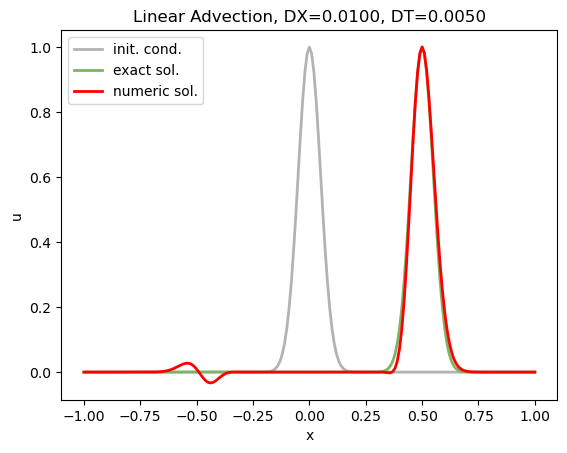

In [2]:
#Centered in Space, Centered in Time
from numpy import pi, exp, cos
def init1(x):
    u0=exp(-(20*x)**2/2)
    return u0

from numpy import arange
def leapfrogadvect(x,dt,T,rho0):
#-- compute spatial step size
    dx= x[1]-x[0]

    #-- initial condition; set up future  time array
    u0=rho0.copy()
    u1=u0.copy()
    u2=u0.copy()    

    #-- now the time loop
    for t in arange(0,T+dt,dt):
        
        if t == 0:
            nu= dt/(2.*dx)
            u1[1:(len(x)-1)]= u0[1:(len(x)-1)] - nu* (u0[2:len(x)]-u0[0:(len(x)-2)])
            u1[0] = u0[0] - nu* (u0[1] - u0[len(x)-1])
            u1[len(x)-1]= u0[len(x)-1] - nu* (u0[0]-u0[len(x)-2])
            u0=u1.copy()            
            
        elif t>0: 
            nu= dt/dx
            u2[1:(len(x)-1)]= u0[1:(len(x)-1)] - nu* (u1[2:len(x)]-u1[0:(len(x)-2)])
            u2[0] = u0[0] - nu* (u1[1] - u1[len(x)-1])
            u2[len(x)-1]= u0[(len(x)-1)] - nu* (u1[0]-u1[len(x)-2])
            
            u0=u1.copy()
            u1=u2.copy()
            #-- set output value
            rho = u2 
            
    return rho

def testlf():
    
    from numpy import arange, pi, exp, cos, inf
    from numpy.linalg import norm
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    #-- initial values/settings
    dx= 1./100.              #- spatial step size
    courant= 0.5             #- Courant No.
    dt= courant* dx          #- time step size
    Tend= .5                 #- final time
    x= arange(-1,1+dx,dx)    #- spatial grid
    
    #-- initial conditions
    u0 = init1(x)
    
    #-- Leap Frog advection scheme
    uctcs = leapfrogadvect(x,dt,Tend,u0)
    
    #-- compute exact solution to compare with
    uexact = init1(x-Tend)
    
    #-- plot the result, the initial condition, and the exact solution
    fig = plt.figure(1)
    h1=plt.plot(x,u0,linewidth=2, c=[0.7, 0.7, 0.7], label='init. cond.')
    h2=plt.plot(x,uexact,linewidth=2, c=[0.5, 0.7, 0.4], label='exact sol.')
    h3=plt.plot(x,uctcs,linewidth=2, c='red', label='numeric sol.')
    plt.legend(loc='upper left')
    plt.title('Linear Advection, DX=' + '%6.4f' % (dx) + ', DT=' + '%6.4f' % (dt))
    plt.xlabel('x')
    plt.ylabel('u')
  
    #-- compute error norms:
    infctcs= norm((uexact-uctcs),inf)/norm(uexact,inf)
    print('*** INFO: relative error in inf-norm ***')
    print('          CTCS method: ' + '%6.4f' % (infctcs))
    twoctcs= norm((uexact-uctcs))/norm(uexact)
    print('*** INFO: relative error in two-norm ***')
    print('          CTCS method: ' + '%6.4f' % (twoctcs))
    
    plt.show()

if __name__=="__main__":
    testlf()

# 3 (b)

Implement this simple stabilization for the leap-frog scheme and test it with e.g. a = 0.05

*** INFO: relative error in inf-norm ***
          CTCS method: 1774815.2873
*** INFO: relative error in two-norm ***
          CTCS method: 1947864.7711


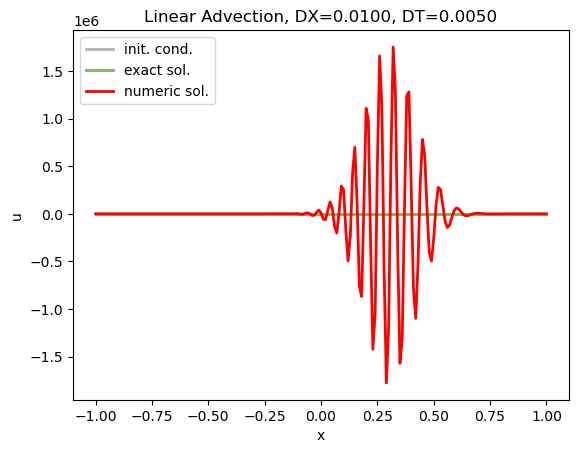

In [7]:
from numpy import arange
def leapfrogadvect(x,dt,T,rho0):
    a=1
#-- compute spatial step size
    dx= x[1]-x[0]

    #-- initial condition; set up future  time array
    u0=rho0.copy()
    u1=u0.copy()
    u2=u0.copy()
    

    #-- now the time loop
    for t in arange(0,T+dt,dt):
        
        if t == 0:
            nu= dt/(2.*dx)
            u1[1:(len(x)-1)]= u0[1:(len(x)-1)] - nu* (u0[2:len(x)]-u0[0:(len(x)-2)])
            u1[0] = u0[0] - nu* (u0[1] - u0[len(x)-1])
            u1[len(x)-1]= u0[(len(x)-1)] - nu* (u0[0]-u0[len(x)-2])
            u0=u1.copy()
            
        elif t>0: 
            nu= dt/(dx)
            u2[1:(len(x)-1)]= u0[1:(len(x)-1)] - nu* (u1[2:len(x)]-u1[0:(len(x)-2)])
            u2[0] = u0[0] - nu* (u1[1] - u1[len(x)-1])
            u2[len(x)-1]= u0[(len(x)-1)] - nu* (u1[0]-u1[len(x)-2])
            
            # Aselin Filter
            u0 = u1 + a*(u2 - (2 * u1) + u0)
            u1=u2.copy()

            #-- set output value
            rho = u2 
            
    return rho

def testlf1():
    
    from numpy import arange, pi, exp, cos, inf
    from numpy.linalg import norm
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    #-- initial values/settings
    dx= 1./100.              #- spatial step size
    courant= 0.5             #- Courant No.
    dt= courant* dx          #- time step size
    Tend= .5                 #- final time
    x= arange(-1,1+dx,dx)    #- spatial grid
    
    #-- initial conditions
    u0 = init1(x)
    
    #-- Lax-Friedrichs advection scheme
    uctcs = leapfrogadvect(x,dt,Tend,u0)
    
    #-- compute exact solution to compare with
    uexact = init1(x-Tend)
    
    #-- plot the result, the initial condition, and the exact solution
    fig = plt.figure(1)
    h1=plt.plot(x,u0,linewidth=2, c=[0.7, 0.7, 0.7], label='init. cond.')
    h2=plt.plot(x,uexact,linewidth=2, c=[0.5, 0.7, 0.4], label='exact sol.')
    h3=plt.plot(x,uctcs,linewidth=2, c='red', label='numeric sol.')
    plt.legend(loc='upper left')
    plt.title('Linear Advection, DX=' + '%6.4f' % (dx) + ', DT=' + '%6.4f' % (dt))
    plt.xlabel('x')
    plt.ylabel('u')
  
    #-- compute error norms:
    infctcs= norm((uexact-uctcs),inf)/norm(uexact,inf)
    print('*** INFO: relative error in inf-norm ***')
    print('          CTCS method: ' + '%6.4f' % (infctcs))
    twoctcs= norm((uexact-uctcs))/norm(uexact)
    print('*** INFO: relative error in two-norm ***')
    print('          CTCS method: ' + '%6.4f' % (twoctcs))
    
    plt.show()

if __name__=="__main__":
    testlf1()
    